In [56]:
import pandas as pd

features = pd.read_csv("C:/Users/HP/OneDrive/Documents/DANNY DATA/Customer Support Data/model_data.csv")
features.head()

,channel_name,category,sub-category,issue_reported_at,issue_responded,response_time_(hours),response_time_(minutes),response_time_(seconds),time_of_issue,time_of_response,report_day_name,report_month_day,response_month_day,response_day_name,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,0.566667,34.0,2040.0,11:13,11:47,Tuesday,1,1,Tuesday,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,0.033333,2.0,120.0,12:52,12:54,Tuesday,1,1,Tuesday,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,0.366667,22.0,1320.0,20:16,20:38,Tuesday,1,1,Tuesday,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,0.333333,20.0,1200.0,20:56,21:16,Tuesday,1,1,Tuesday,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,0.033333,2.0,120.0,10:30,10:32,Tuesday,1,1,Tuesday,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


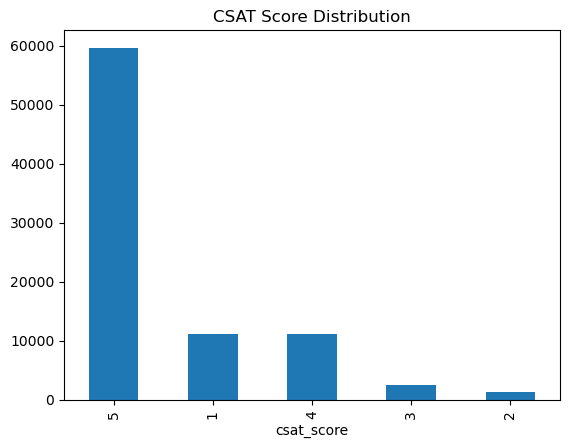

In [57]:
import matplotlib.pyplot as plt

# Check class distribution
features['csat_score'].value_counts().plot(kind='bar', title='CSAT Score Distribution')
plt.show()


In [58]:
features = features[["channel_name","response_day_name", "report_day_name",  "response_time_(hours)", "csat_score"]]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Assuming 'processed_data' is your DataFrame
# 1. Data Preparation

# Create dummy variables for report_day_name and response_day_name
# features = pd.get_dummies(features, columns=["report_day_name", "response_day_name", "channel_name"])

encoder = LabelEncoder()
features["report_day_name"] = encoder.fit_transform(features[["report_day_name"]])
features["response_day_name"] = encoder.fit_transform(features[["response_day_name"]])
features["channel_name"] =encoder.fit_transform(features[["channel_name"]])

scaler = StandardScaler()
features["response_time_(hours)"] = scaler.fit_transform(features[["response_time_(hours)"]])




c:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
features.head()

,channel_name,response_day_name,report_day_name,response_time_(hours),csat_score
0,2,5,5,-0.173641,5
1,2,5,5,-0.227647,5
2,1,5,5,-0.193893,5
3,1,5,5,-0.197269,5
4,1,5,5,-0.227647,5


In [ ]:
# Separate features (X) and target variable (y)
X = features.drop(columns=["csat_score"])
y = features["csat_score"]
from xgboost import XGBClassifier
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=82, shuffle=True)

# Define the XGBoost model with class weighting
model = XGBClassifier(
    objective='multi:softmax',   # Multi-class classification
    num_class=5,                 # Number of unique classes (1 to 5)
    scale_pos_weight=10,         # Adjust for class imbalance
    random_state=42,
)

# Train the model

# Shift the CSAT score to start from 0 instead of 1
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Train the model with adjusted labels
model.fit(X_train, y_train_adjusted)

# Predict using the test set
y_pred_adjusted = model.predict(X_test)

# Shift predictions back to original CSAT range
y_pred = y_pred_adjusted + 1
y_test = y_test_adjusted + 1

# Evaluate the model
print(classification_report(y_test, y_pred))


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.30      0.02      0.04      2283
           2       0.50      0.00      0.01       243
           3       0.50      0.00      0.00       527
           4       0.11      0.00      0.00      2222
           5       0.69      0.99      0.82     11907

    accuracy                           0.69     17182
   macro avg       0.42      0.20      0.17     17182
weighted avg       0.56      0.69      0.57     17182

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.00      0.00      2283
           2       0.00      0.00      0.00       243
           3       0.00      0.00      0.00       527
           4       0.13      0.99      0.23      2222
           5       0.00      0.00      0.00     11907

    accuracy                           0.13     17182
   macro avg       0.10      0.17      0.04     17182
weighted avg       0.08

c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.

In [63]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softmax', num_class=5, random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_adjusted)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.00      0.00      2283
           2       0.12      0.00      0.01       243
           3       0.03      0.00      0.00       527
           4       0.13      0.98      0.23      2222
           5       0.00      0.00      0.00     11907

    accuracy                           0.13     17182
   macro avg       0.10      0.17      0.04     17182
weighted avg       0.06      0.13      0.03     17182



c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.